In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from tqdm import tqdm
from IPython.display import display, Image

# 4.1
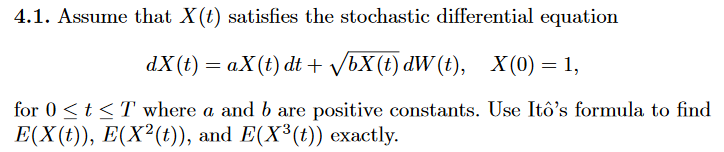

In [11]:
print('Первый момент')
display(Image(url='https://sun9-43.userapi.com/impf/GHx3D7AGfD2wOZwMPPNR3jWfTWLPvWHyzEwTwQ/30fhilvNHHY.jpg?size=1531x2048&quality=96&proxy=1&sign=3f7547d52643468f2f072666070fe7f7',
     width=500))
print('Второй момент')
display(Image(url='https://sun9-52.userapi.com/impf/0dmBbZKAGE-sDAzeXd5puWbbjt8RPRRA54-rHg/CgbJfe7_Y4Y.jpg?size=1531x2048&quality=96&proxy=1&sign=e9fc2476a004b9f155faba900caeed4d',
             width=500))
print("Третий момент")
display(Image(url='https://sun9-33.userapi.com/impf/nLIh7RyiDWdsQtTIinDtBLnfpXej_oMRwTqWUg/S2tifxy0O90.jpg?size=1615x2160&quality=96&proxy=1&sign=8cbb7580d1df099e408422c146e12bbd',
             width=500))
display(Image(url='https://sun9-53.userapi.com/impf/r7CCt-vM1ruYTgexNpFQ-rKGftP8ca0XRBfkOA/oIW8dzc3ruY.jpg?size=2048x1531&quality=96&proxy=1&sign=250f8e3a6fe8595136b523f3af0d3b1e',
     width=500))

Первый момент


Второй момент


Третий момент


# 4.2
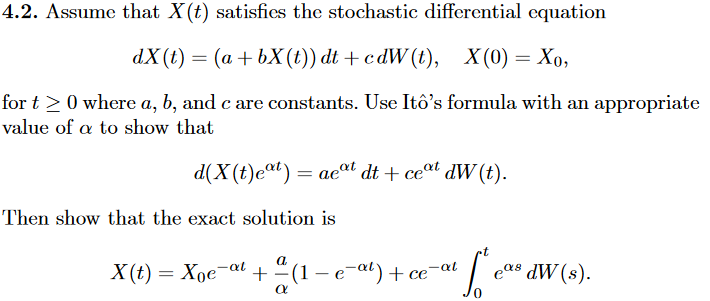

In [12]:
Image(url='https://sun9-18.userapi.com/impf/3yzG3ZubPS23FHZoqyjAgogF1Cjc-MdwkQGeTw/c0bsBY-fAQI.jpg?size=1531x2048&quality=96&proxy=1&sign=e9a041342b2fd9bb952c6dfc27d870cb',
     width=500)

# 4.5
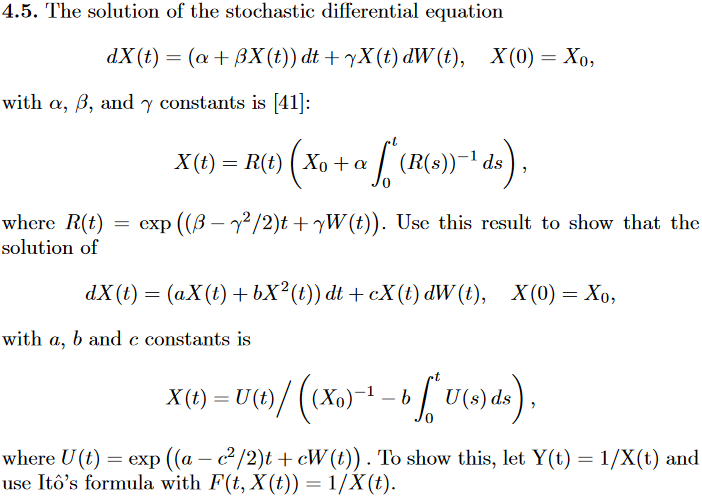

In [14]:
display(Image(url='https://sun9-9.userapi.com/impf/jfldTUXCLefFY3chp4LxcFwIo4uBvbddDak1Lw/AK3Tku2aUww.jpg?size=1531x2048&quality=96&proxy=1&sign=0fe4ac3d9cf84e2d2a1e4ba949d0ab7d',
             width=500))
display(Image(url='https://sun9-61.userapi.com/impf/4-WC7PxGZPy0Ol0TYfzPh6N01CoBPFXE13dugw/LSynNTJkpFI.jpg?size=1531x2048&quality=96&proxy=1&sign=00e1155e5ba7ecef066a32888f7b521f',
             width=500))

# 4.6

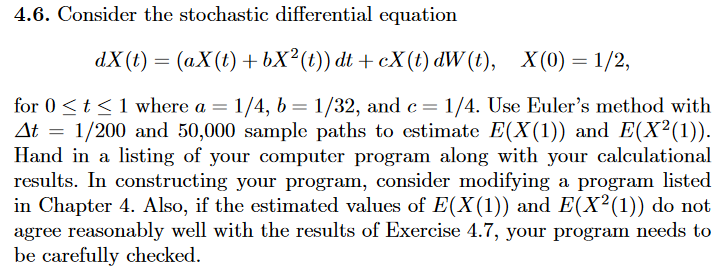

In [70]:
np.random.seed(0)

step = 1/200
N = 50000  # number of sample paths

# equation parameters
a = 1/4
b = 1/32
c = 1/4

# initial condition
X0 = 1/2

# Euler's method
t = 0
X = X0

X_samples = np.zeros(50000)
for j in tqdm(range(N)):
    X = X0
    W = norm(0, step**2).rvs(200)
    for i in range(200):    
        t += step

        # f
        f = (a * X + b * X**2)
        g = c * X
        X += f * step + g * W[i]
    X_samples[j] = X
X_samples.mean()

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:49<00:00, 1001.40it/s]


0.6534895072244042

In [46]:
(X_samples * X_samples).mean()

0.42712482172551774

In [38]:
# Milstein's method

np.random.seed(0)

step = 1/200
N = 50000  # number of sample paths

# equation parameters
a = 1/4
b = 1/32
c = 1/4

# initial condition
X0 = 1/2

X_samples = np.zeros(50000)

traj1 = np.zeros(200)
traj1[0] = X0
traj2 = np.zeros(200)
traj2[0] = X0

for j in tqdm(range(N)):
    X = X0
    W = norm(0, step).rvs(200)
    t = 0

    for i in range(200):    
        t += step

        f = (a * X + b * X**2)
        g = c * X
        
        X += f * step + g * W[i] + 1/2 * g * c * (W[i]**2 - step)
        # print(W[i])
        if j == 0:
            traj1[i] = X
        elif j == 1:
            traj2[i] = X
        
    
    X_samples[j] = X
X_samples.mean()

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:03<00:00, 784.01it/s]


0.6333753591871295

<AxesSubplot:ylabel='Density'>

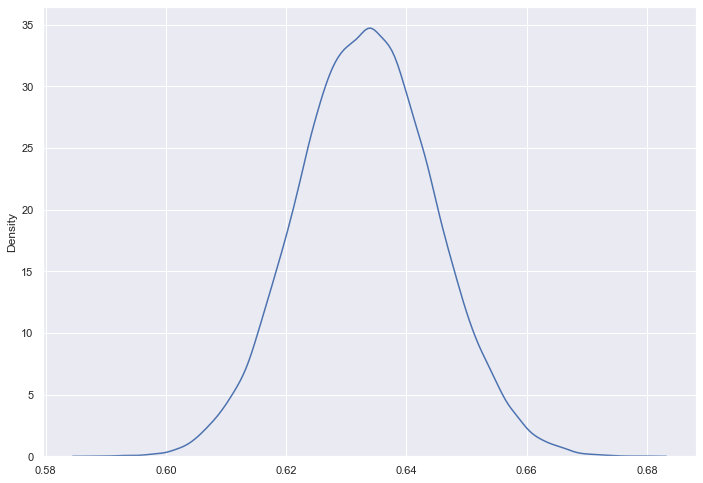

In [55]:
sns.kdeplot(X_samples)

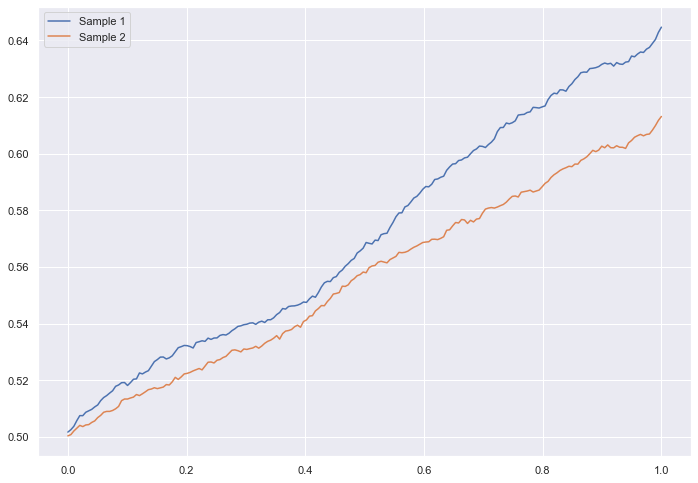

In [52]:
x = np.linspace(0, 1, len(traj1))
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x=x, y=traj1, label='Sample 1');
sns.lineplot(x=x, y=traj2, ax=ax, label='Sample 2');

In [27]:
t

1.0000000000000007

In [24]:
(X_samples * X_samples).mean()

0.40097501744097763

# 4.7

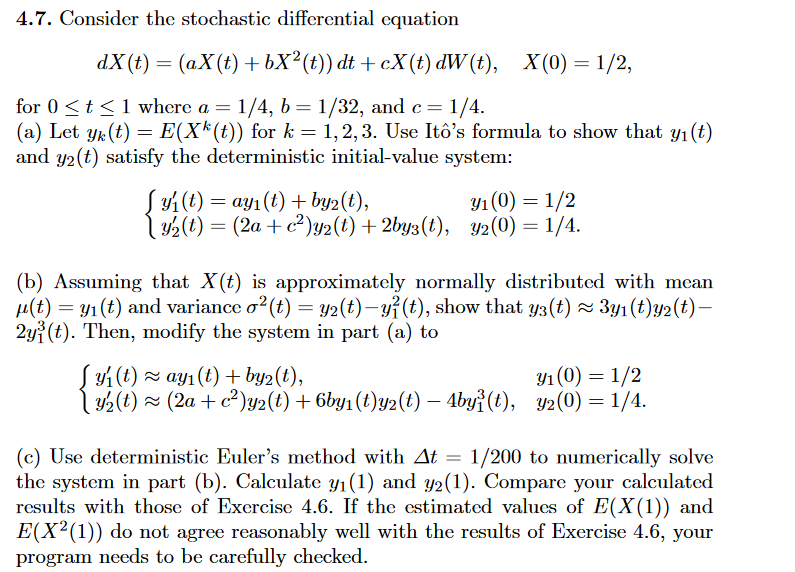

In [17]:
display(Image(url='https://sun9-25.userapi.com/impf/M5EwlBngn_R_G71hWTjQLu604M2p9F8TbneaRg/3GmEc4USRCQ.jpg?size=1531x2048&quality=96&proxy=1&sign=e2dde3ad1c54593c56ee73a4b13e3ae0',
       width=500))
display(Image(url='https://sun9-29.userapi.com/impf/d5lV0boJKWDytoC_edX89TGHpMBrKQEIi_DbRQ/_GgNBJNjeQg.jpg?size=627x248&quality=96&proxy=1&sign=9ea796f52063b093990c660aa7ac330a',
             width=500))

In [53]:
from sympy import symbols, diff, exp

In [55]:
t, mu, sigma = symbols('t mu sigma')

In [62]:
first = diff(exp(mu*t + sigma**2 * t**2 / 2), t)
second = diff(first, t)
third = diff(second, t)
third

3*sigma**2*(mu + sigma**2*t)*exp(mu*t + sigma**2*t**2/2) + (mu + sigma**2*t)**3*exp(mu*t + sigma**2*t**2/2)

In [66]:
y1_0 = 1/2
y2_0 = 1/4

step = 1/200

# equation parameters
a = 1/4
b = 1/32
c = 1/4

t = 0
y1 = y1_0
y2 = y2_0

for i in range(1, 201):
    new_y1 = (a*y1 + b*y2) * step
    new_y2 = ((2*a + c**2) * y2 + 6*b*y1*y2  - 4*b*y1**3) * step
    y1 += new_y1
    y2 += new_y2
y1, y2  # совпадает

(0.6538806374807511, 0.455386600155152)

# 4.9

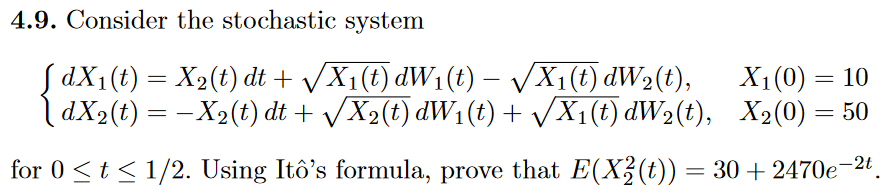

In [19]:
display(Image(url='https://sun9-55.userapi.com/impf/1odwrM-9cMSDi5KNED9fQ7vIWBGUB5nTPNv2Dw/niRxyC6DRvs.jpg?size=1531x2048&quality=96&proxy=1&sign=1c469b30f869b1bcb5aa06878ead89f9',
             width=500))
display(Image(url='https://sun9-36.userapi.com/impf/73bn1n5O8JJedLnbBhGXIoPmB_xMFjQ5if_m0Q/-2dIicfJtqY.jpg?size=1531x2048&quality=96&proxy=1&sign=5f4117e3a260ddd36b4a60eadf86ab9f',
             width=500))

# 4.10
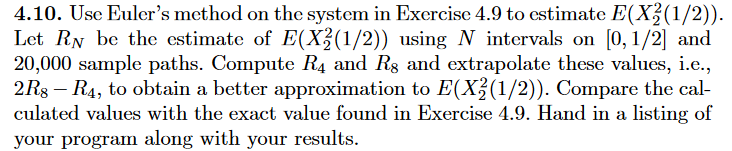

In [75]:
X1_0 = 10
X2_0 = 50

N = 20000  # number of sample paths

number_of_intervals = 8

T = 1/2 

step = T / number_of_intervals

X1_samples = np.zeros(N)
X2_samples = np.zeros(N)

for j in tqdm(range(N)):
    X1 = X1_0
    X2 = X2_0
    
    W1 = norm(0, step**2).rvs(number_of_intervals)
    W2 = norm(0, step**2).rvs(number_of_intervals)
    for i in range(number_of_intervals): 
    
        addX1 = X2*step + np.sqrt(X1) * W1[i] - np.sqrt(X1) * W2[i]
        addX2 = -X2*step + np.sqrt(X2) * W1[i] + np.sqrt(X2) * W2[i]
        X1 += addX1
        X2 += addX2
    
    X1_samples[j] = X1
    X2_samples[j] = X2

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:24<00:00, 805.07it/s]


In [74]:
R4 = (X2_samples * X2_samples).mean()
R4

858.9867791146826

In [76]:
R8 = (X2_samples * X2_samples).mean()
R8

890.20035328498

In [77]:
2 * R8 - R4

921.4139274552774

In [78]:
# exact value:
30 + 2470 * np.exp(-1)  # close enough

938.6622196934626

# 4.11

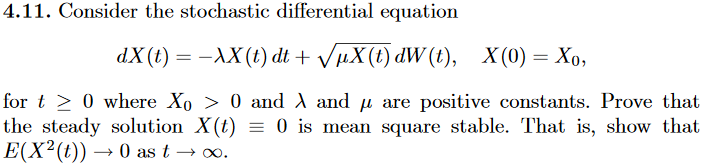

In [21]:
Image(url='https://sun9-6.userapi.com/impf/yRzxQszmDnQP2dyz9MuYxIiSk--2QY5aN6BXvg/DR5GeFFU530.jpg?size=1531x2048&quality=96&proxy=1&sign=e060e5b33f80f752f0e8fd479b9f370e',
     width=500)